<a href="https://colab.research.google.com/github/Pravalka/Fraud-Detection/blob/main/FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

df = pd.read_csv('/content/Fraud.csv')

# Drop unnecessary columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Handling missing values if any
df = df.dropna()

# Handling outliers ( using IQR method for the 'amount' column)
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['amount'] >= (Q1 - 1.5 * IQR)) & (df['amount'] <= (Q3 + 1.5 * IQR))]

# Encoding categorical variables
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Splitinng data into features and target variable
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initializing Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate ROC-AUC score
auc_score_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest ROC-AUC Score: {auc_score_rf}")



Random Forest ROC-AUC Score: 0.6571376300245675


In [ ]:
!pip install catboost xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

clf = CatBoostClassifier(iterations=500,
                         learning_rate=0.02,
                         depth=12,
                         eval_metric='AUC',
                         random_seed=42,
                         bagging_temperature=0.2,
                         od_type='Iter',
                         metric_period=50,
                         od_wait=100)

# Train the classifier
clf.fit(X_train, y_train, verbose=True)

# Predict on the test set
y_pred_catboost = clf.predict(X_test)

# Calculate ROC-AUC score
auc_score_catboost = roc_auc_score(y_test, y_pred_catboost)
print(f"CatBoost ROC-AUC Score: {auc_score_catboost}")


0:	total: 350ms	remaining: 2m 54s
50:	total: 13.3s	remaining: 1m 56s
100:	total: 26.9s	remaining: 1m 46s
150:	total: 43.4s	remaining: 1m 40s
200:	total: 58.5s	remaining: 1m 26s
250:	total: 1m 12s	remaining: 1m 11s
300:	total: 1m 25s	remaining: 56.6s
350:	total: 1m 38s	remaining: 41.9s
400:	total: 1m 51s	remaining: 27.4s
450:	total: 2m 4s	remaining: 13.5s
499:	total: 2m 17s	remaining: 0us
CatBoost ROC-AUC Score: 0.7714285714285714


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define AdaBoostClassifier with desired parameters
clf_ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=42)

# Train the classifier
clf_ada.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = clf_ada.predict(X_test)

# Calculate ROC-AUC score
auc_score_ada = roc_auc_score(y_test, y_pred_ada)
print(f"AdaBoost ROC-AUC Score: {auc_score_ada}")



AdaBoost ROC-AUC Score: 0.8574515124108131


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBClassifier with desired parameters
clf_xgb = XGBClassifier(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42)

# Train the classifier
clf_xgb.fit(X_train, y_train, eval_metric='auc', verbose=True)

# Predict on the test set
y_pred_xgb = clf_xgb.predict(X_test)

# Calculate ROC-AUC score
auc_score_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"XGBoost ROC-AUC Score: {auc_score_xgb}")



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBoost ROC-AUC Score: 0.8976484775399458


[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


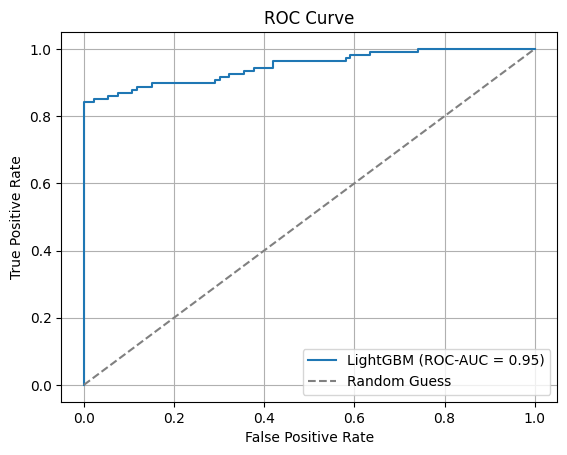

LightGBM ROC-AUC Score: 0.9480454225705959
LightGBM Accuracy: 0.895


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification

# Generating a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM classifier with specific parameters
lgbm_clf = LGBMClassifier(random_state=42, num_leaves=31, force_col_wise=True)

# Training the model
lgbm_clf.fit(X_train, y_train)

# Predictions
y_pred = lgbm_clf.predict(X_test)
y_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score and accuracy
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'LightGBM (ROC-AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')

# Plot labels and display plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Display ROC-AUC score and accuracy
print(f"LightGBM ROC-AUC Score: {roc_auc}")
print(f"LightGBM Accuracy: {accuracy}")


[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


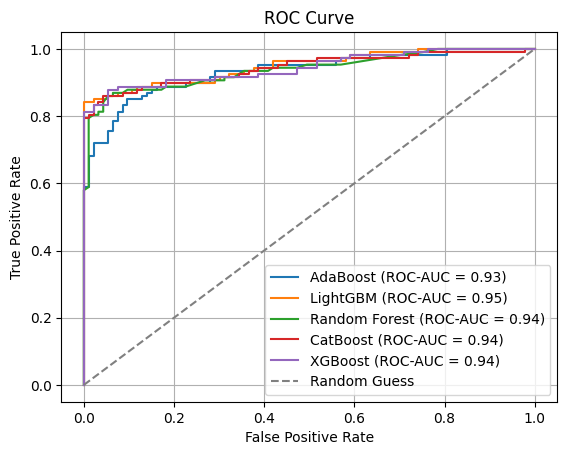


Model Comparison:
           Model  ROC-AUC Score  Accuracy
0       AdaBoost       0.931866     0.870
1       LightGBM       0.948045     0.895
2  Random Forest       0.937946     0.900
3       CatBoost       0.942418     0.900
4        XGBoost       0.943523     0.895


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

# Generating a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
adaboost_clf = AdaBoostClassifier(random_state=42)
lgbm_clf = LGBMClassifier(random_state=42, num_leaves=31)
random_forest_clf = RandomForestClassifier(random_state=42)
catboost_clf = CatBoostClassifier(random_state=42, verbose=0)
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# List of models
models = {
    'AdaBoost': adaboost_clf,
    'LightGBM': lgbm_clf,
    'Random Forest': random_forest_clf,
    'CatBoost': catboost_clf,
    'XGBoost': xgb_clf
}

# Training and evaluating each model
results = {'Model': [], 'ROC-AUC Score': [], 'Accuracy': []}

for model_name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculating metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)

    # Storing results
    results['Model'].append(model_name)
    results['ROC-AUC Score'].append(roc_auc)
    results['Accuracy'].append(accuracy)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (ROC-AUC = {roc_auc:.2f})')

# Plotting ROC curves
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Displaying results table
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)
